# eda006
リピートの割合など

In [1]:
import os
import sys
from dotenv import load_dotenv
load_dotenv
sys.path.append(os.getenv('UTILS_PATH'))
import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns
from PIL import Image
from pathlib import Path

In [2]:
INPUT_DIR = os.getenv('INPUT_DIR')
OUTPUT_DIR = os.getenv('OUTPUT_DIR')

In [3]:
import builtins
import types

def imports():
    for name, val in globals().items():
        # module imports
        if isinstance(val, types.ModuleType):
            yield name, val

            # functions / callables
        if hasattr(val, '__call__'):
            yield name, val


def noglobal(f):
    '''
    ref: https://gist.github.com/raven38/4e4c3c7a179283c441f575d6e375510c
    '''
    return types.FunctionType(f.__code__,
                              dict(imports()),
                              f.__name__,
                              f.__defaults__,
                              f.__closure__
                              )

In [4]:
def show_images(article_ids, cols=1, rows=-1):
    if isinstance(article_ids, int) or isinstance(article_ids, str):
        article_ids = [article_ids]
    article_count = len(article_ids)
    if rows < 0: rows = (article_count // cols) + 1
    plt.figure(figsize=(3 + 3.5 * cols, 3 + 5 * rows))
    for i in range(article_count):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(article_id)
        try:
            image = Image.open(INPUT_DIR + f"images/{article_id[:3]}/{article_id}.jpg")
            plt.imshow(image)
        except:
            pass

In [5]:
articles = pd.read_csv(INPUT_DIR + 'articles.csv', dtype='object')
customers = pd.read_csv(INPUT_DIR + 'customers.csv')
transactions = pd.read_csv(INPUT_DIR + 'transactions_train.csv', dtype={'article_id':'str'}, parse_dates=['t_dat'])
sample = pd.read_csv(INPUT_DIR + 'sample_submission.csv')

In [6]:
transactions = transactions.drop_duplicates(subset=['t_dat', 'customer_id', 'article_id'])
transactions['cnt'] = transactions.groupby(['customer_id', 'article_id']).cumcount()
first = len(transactions[transactions['cnt']==0]) 
repeat = len(transactions[transactions['cnt']>0])
print(f'初回購入 : {first}  リピート購入 : {repeat}  リピート購入比率 : {repeat / len(transactions)}')

初回購入 : 27306439  リピート購入 : 1268956  リピート購入比率 : 0.044407295157249796


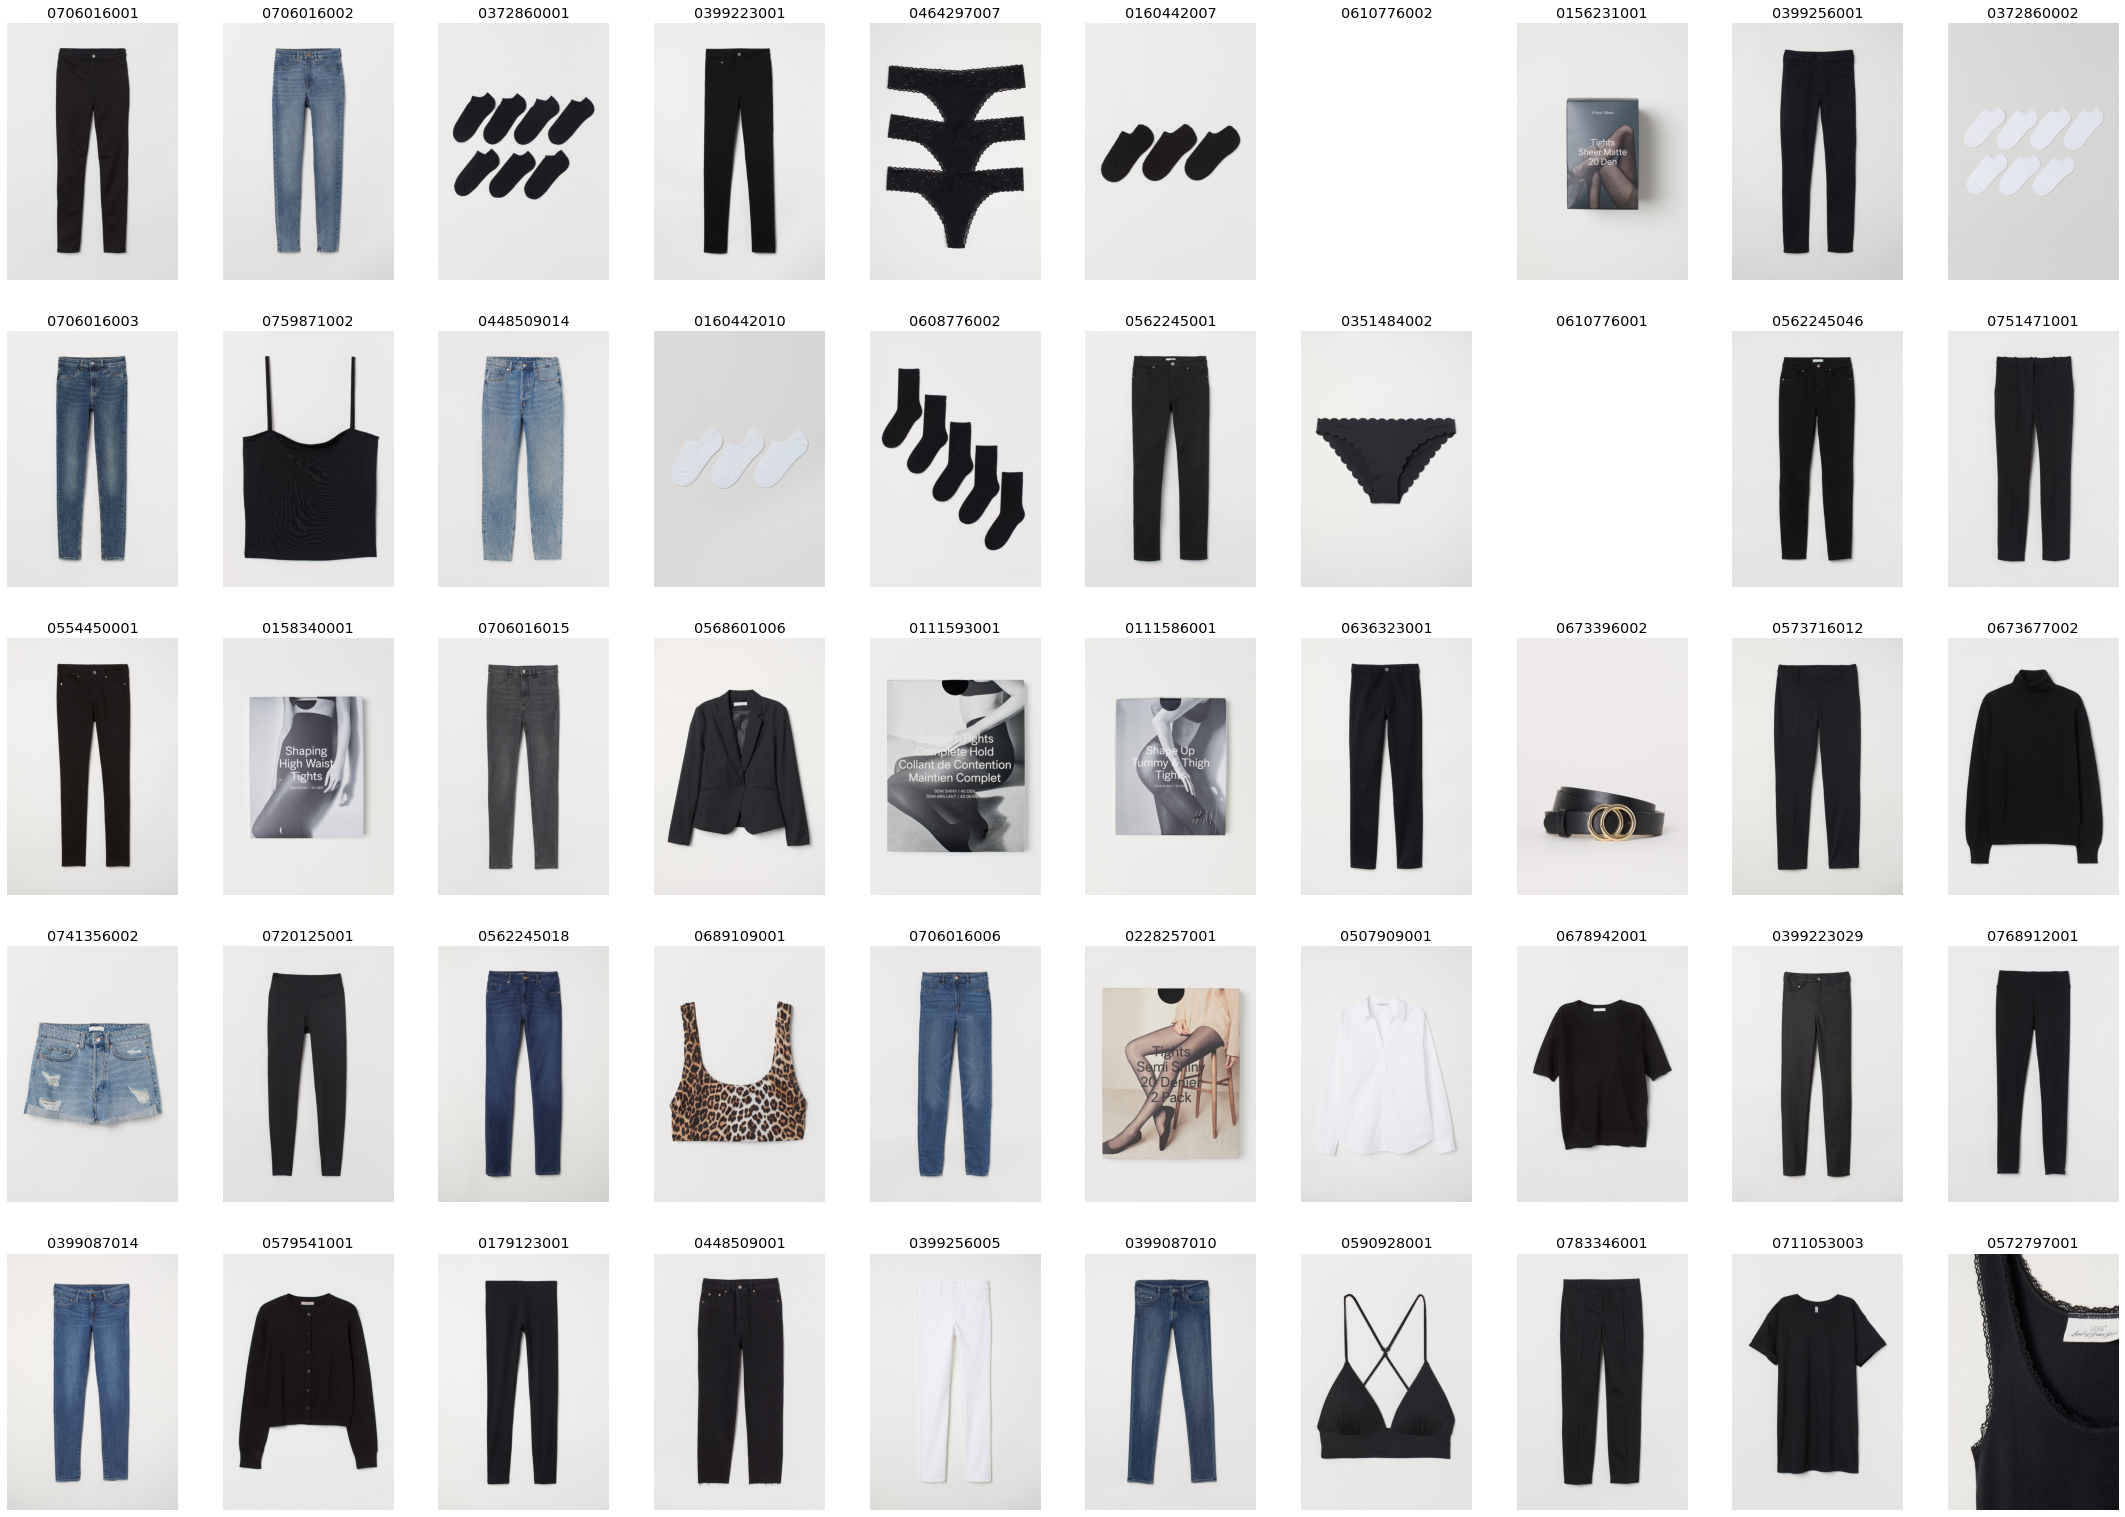

In [24]:
repeat_transactions = transactions[transactions['cnt']>0]
repeat_transactions = repeat_transactions.drop_duplicates(subset=['customer_id', 'article_id'])
repeat_items = repeat_transactions['article_id'].value_counts().index[:50]
show_images(repeat_items, cols=10)

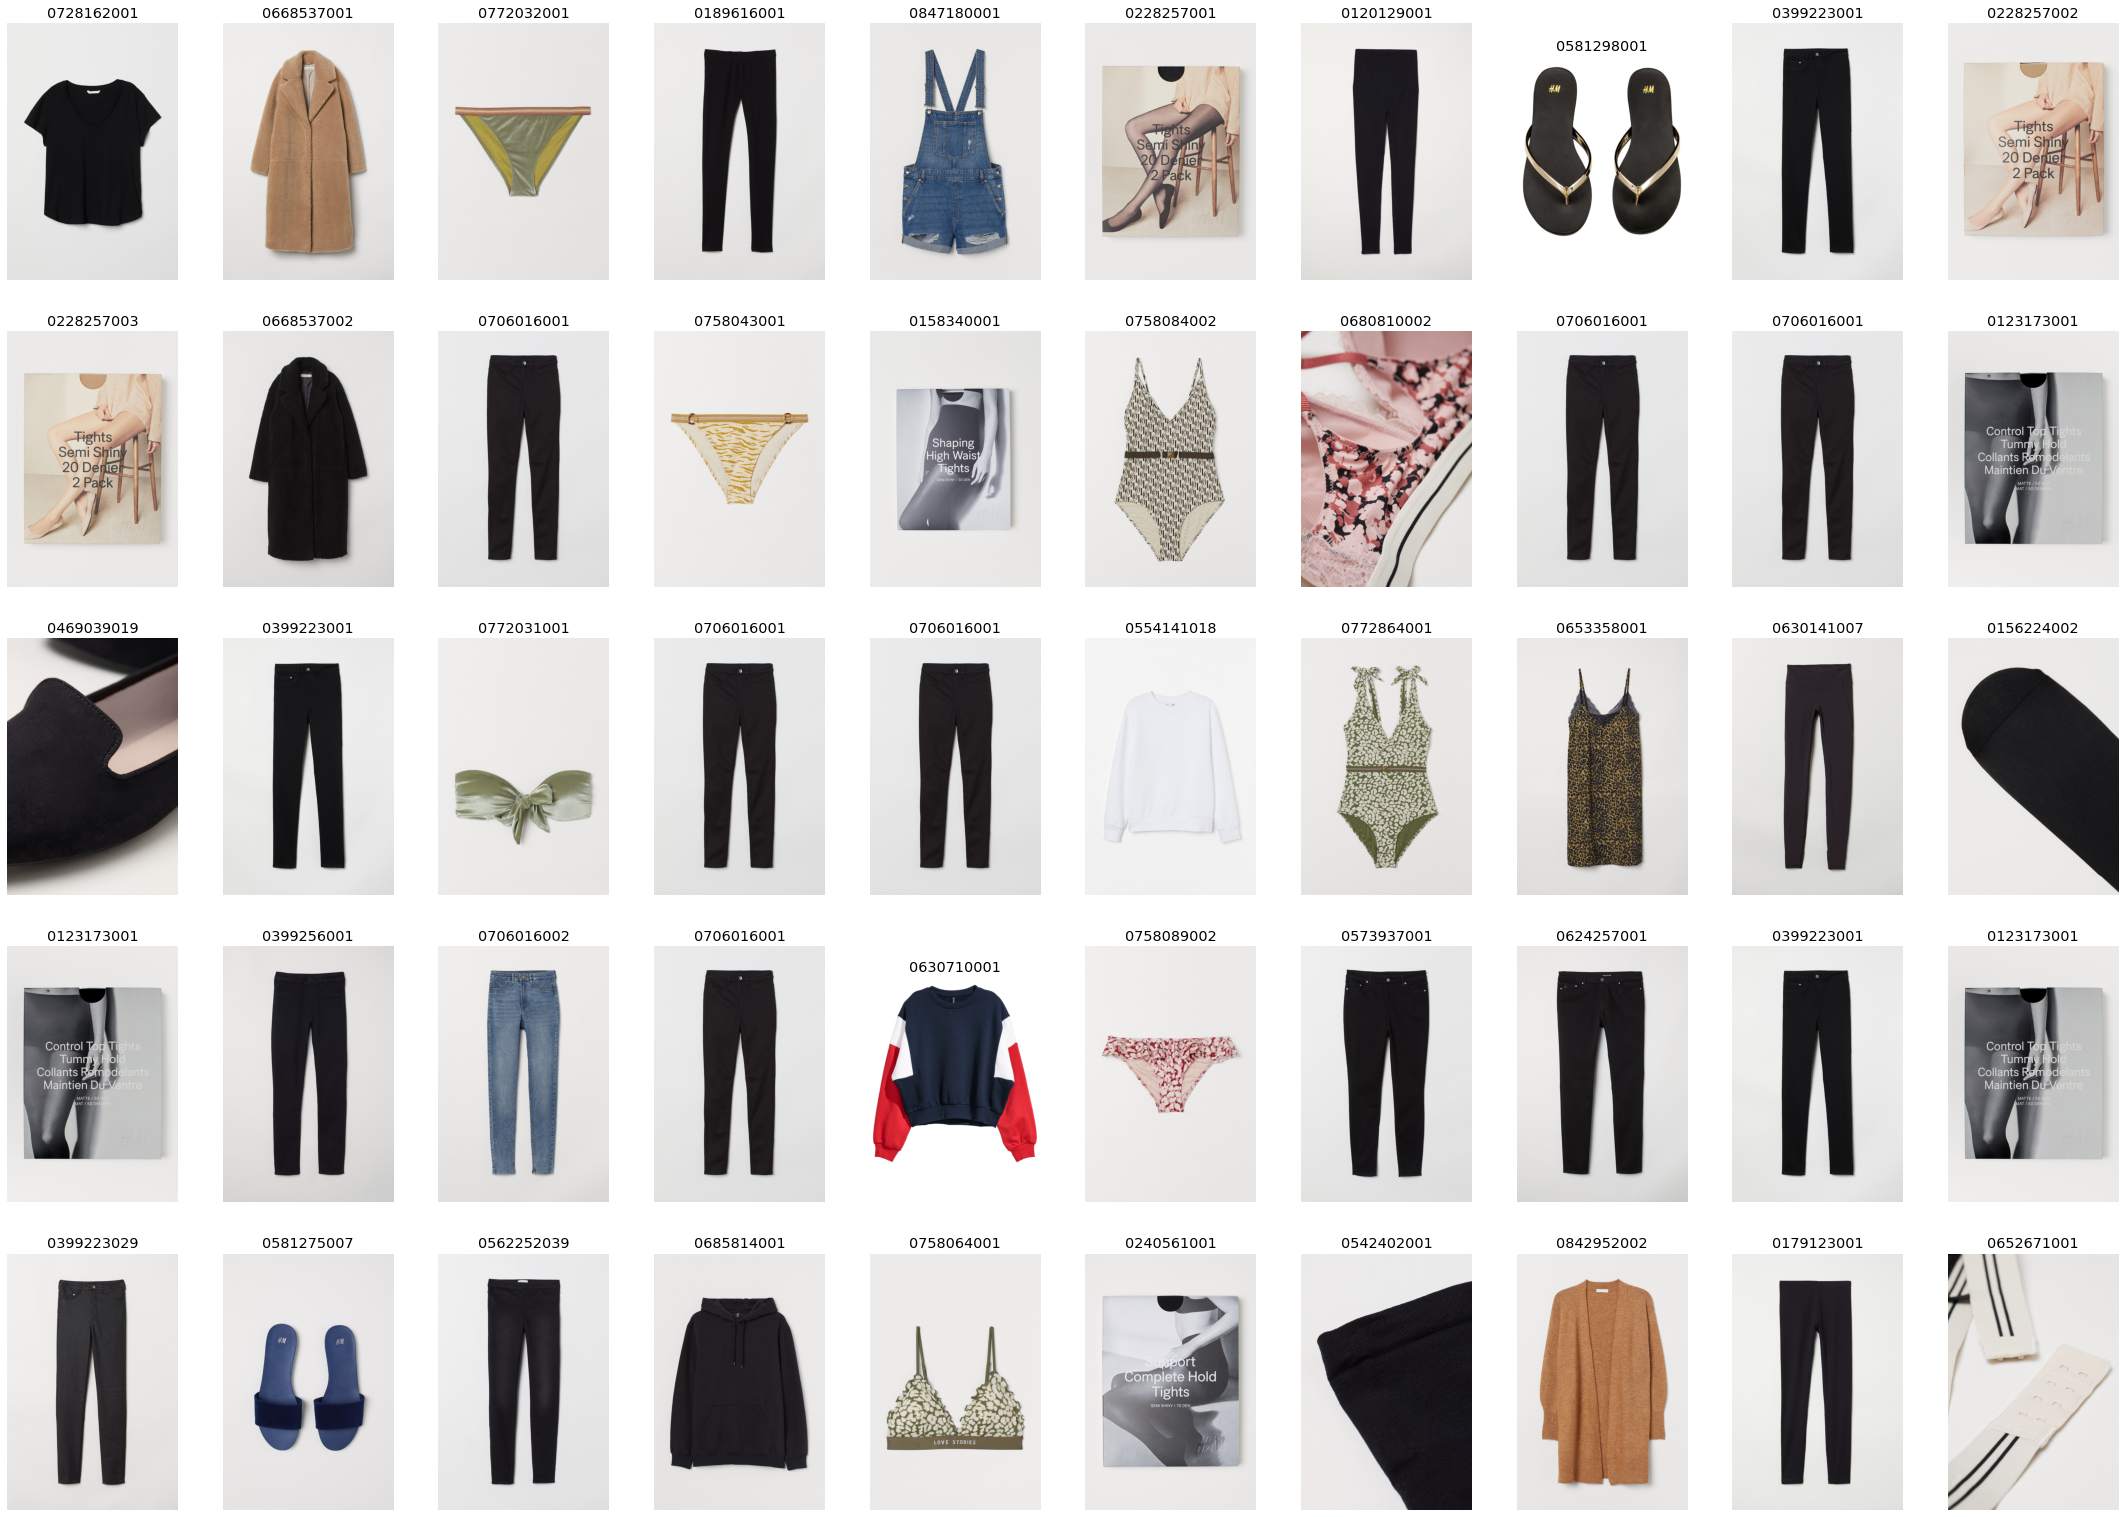

In [28]:
df = transactions.sort_values('cnt', ascending=False).drop_duplicates(['customer_id', 'article_id'])
items = df['article_id'].tolist()[:50]
show_images(items, cols=10)

In [52]:
valid = pd.read_csv(OUTPUT_DIR + 'exp028/exp028_oof1.csv')
valid = valid.sort_values(['customer_id', 'pred'], ascending=False)
valid = valid.groupby('customer_id').head(12)
valid_correct = valid[valid['buy']==1].copy()
first = len(valid_correct[valid_correct['count'].isnull()])
repeat = len(valid_correct[~valid_correct['count'].isnull()])
print(f'初回購入 : {first}  リピート購入 : {repeat}  リピート購入比率 : {repeat / (first + repeat)}')

初回購入 : 3378  リピート購入 : 6427  リピート購入比率 : 0.655481896991331
